<a href="https://colab.research.google.com/github/HenryZumaeta/MDS_UNI/blob/Zeta/CICLO02/MLSFUN/DESERCI%C3%93N_TC_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MODELO DE CHURN DE TC**

Una entidad financiera busca tener un score de churn de alerta temprana para el negocio de TC. Actualmente el negocio de la tarjeta de crédito de esta entidad tienen problemas internos y externos.
A nivel externo:
Existe falta de competitividad con su competidores en el negocio de TC.
Baja participación de mercado
Poca variación en saldo.
A nivel inteerno:
Esta generando perdidas e la organización.

**CARGAR LIBRERIAS**


In [ ]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm
import multiprocessing

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

**CARGAR BASE DE DATOS**

In [ ]:
!pip install pyreadstat
import pyreadstat
Data = pd.read_spss("BASE CHURN TC.sav")

In [3]:
Data.head(10)

,CodCli,Edad,Gener,EstCiv,Sexo,Ingreso,TipSuel,NZona,FechIni,FechCor,...,SalTC_RCC_Cenco,SalTC_RCC_Azt,SalTC_RCC_Fala,SalTC_RCC_Uno,SalTC_RCC_Citi,TotSal_RCC_TC,MaxSal_RCC_TC,Entidad_RCC_TC,Churn,ChurnTC
0,11332.0,57.0,BABY BOOMERS : [50 - 68],Casado,Masculino,4641.28,DEPENDIENTE,LIMA MODERNA,1.288708e+10,1.365241e+10,...,NaN,NaN,NaN,NaN,NaN,22439.67,22439.67,B. Credito,0.0,NO
1,12230.0,49.0,X : [36 - 49],Soltero,Masculino,1920.00,DEPENDIENTE,ZONA NORTE,1.292440e+10,1.365241e+10,...,NaN,NaN,NaN,NaN,NaN,1089.31,1062.13,B. Ripley,0.0,NO
2,13131.0,75.0,SILENCIOSA : [69 - MÁS>,Viudo,Femenino,1184.41,DEPENDIENTE,ZONA NORTE,1.243417e+10,1.365241e+10,...,NaN,NaN,49.80,NaN,NaN,49.80,49.80,B. Falabella,0.0,NO
3,14084.0,61.0,BABY BOOMERS : [50 - 68],Soltero,Masculino,1255.79,DEPENDIENTE,LIMA MODERNA,1.297892e+10,1.365241e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NO
4,18835.0,65.0,BABY BOOMERS : [50 - 68],Casado,Masculino,904.70,INFORMAL,ZONA NORTE,1.306014e+10,1.365241e+10,...,NaN,NaN,NaN,NaN,NaN,1499.00,1499.00,B. Financiero,0.0,NO
5,19329.0,39.0,X : [36 - 49],Soltero,Masculino,1248.32,INDEPENDIENTE,ZONA NORTE,1.306947e+10,1.365241e+10,...,1694.39,NaN,NaN,1877.87,NaN,13629.09,8450.89,B. Interbank,0.0,NO
6,22046.0,51.0,BABY BOOMERS : [50 - 68],Casado,Masculino,1988.43,DEPENDIENTE,LIMA NORTE,1.315008e+10,1.365241e+10,...,NaN,NaN,NaN,NaN,NaN,17370.29,10584.76,B. Interbank,0.0,NO
7,23112.0,51.0,BABY BOOMERS : [50 - 68],Casado,Masculino,1136.27,INDEPENDIENTE,LIMA MODERNA,1.315561e+10,1.365241e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,SI
8,24015.0,65.0,BABY BOOMERS : [50 - 68],Soltero,Femenino,2169.34,DEPENDIENTE,LIMA MODERNA,1.296181e+10,1.365241e+10,...,NaN,NaN,199.39,NaN,NaN,199.39,199.39,B. Falabella,0.0,NO
9,24475.0,56.0,BABY BOOMERS : [50 - 68],Casado,Femenino,798.00,INDEPENDIENTE,LIMA ESTE,1.296890e+10,1.365241e+10,...,NaN,NaN,NaN,NaN,NaN,145.53,145.53,F. Crediscotia,1.0,SI


**FASE 2 y 3: COMPRENSIÓN Y PREPARACIÓN DE LOS DATOS**

**ANALISIS DE DATOS PERDIDOS**

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 60 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   CodCli              10000 non-null  float64 
 1   Edad                10000 non-null  float64 
 2   Gener               10000 non-null  category
 3   EstCiv              10000 non-null  category
 4   Sexo                10000 non-null  category
 5   Ingreso             10000 non-null  float64 
 6   TipSuel             10000 non-null  category
 7   NZona               10000 non-null  category
 8   FechIni             10000 non-null  float64 
 9   FechCor             10000 non-null  float64 
 10  AntiAño             10000 non-null  float64 
 11  AntiMes             10000 non-null  float64 
 12  Ahorro              1522 non-null   float64 
 13  Plazo               172 non-null    float64 
 14  Cts                 131 non-null    float64 
 15  Chip                42 non-null     f

In [ ]:
 Data.isnull().sum()

**DICOTOMIZACION DE LOS DATOS PERDIDOS**


In [5]:
Data["D_Ahorro"] = np.where(Data["Ahorro"].isnull() == True,0,1)
Data["D_LinTC_RCC_BCP"] = np.where(Data["LinTC_RCC_BCP"].isnull() == True,0,1)
Data["D_LinTC_RCC_IBK"] = np.where(Data["LinTC_RCC_IBK"].isnull() == True,0,1)
Data["D_LinTC_RCC_Conti"] = np.where(Data["LinTC_RCC_Conti"].isnull() == True,0,1)
Data["D_LinTC_RCC_Credi"] = np.where(Data["LinTC_RCC_Credi"].isnull() == True,0,1)
Data["D_LinTC_RCC_Ripley"] = np.where(Data["LinTC_RCC_Ripley"].isnull() == True,0,1)
Data["D_LinTC_RCC_Finan"] = np.where(Data["LinTC_RCC_Finan"].isnull() == True,0,1)
Data["D_LinTC_RCC_Cenco"] = np.where(Data["LinTC_RCC_Cenco"].isnull() == True,0,1)
Data["D_LinTC_RCC_Fala"] = np.where(Data["LinTC_RCC_Fala"].isnull() == True,0,1)
Data["D_LinTC_RCC_Uno"] = np.where(Data["LinTC_RCC_Uno"].isnull() == True,0,1)
Data["D_SalTC_RCC_BCP"] = np.where(Data["SalTC_RCC_BCP"].isnull() == True,0,1)
Data["D_SalTC_RCC_IBK"] = np.where(Data["SalTC_RCC_IBK"].isnull() == True,0,1)
Data["D_SalTC_RCC_Credi"] = np.where(Data["SalTC_RCC_Credi"].isnull() == True,0,1)
Data["D_SalTC_RCC_Ripley"] = np.where(Data["SalTC_RCC_Ripley"].isnull() == True,0,1)
Data["D_SalTC_RCC_Finan"] = np.where(Data["SalTC_RCC_Finan"].isnull() == True,0,1)
Data["D_SalTC_RCC_Cenco"] = np.where(Data["SalTC_RCC_Cenco"].isnull() == True,0,1)
Data["D_SalTC_RCC_Fala"] = np.where(Data["SalTC_RCC_Fala"].isnull() == True,0,1)
Data["D_SalTC_RCC_Uno"] = np.where(Data["SalTC_RCC_Uno"].isnull() == True,0,1)
Data["D_TotSal_RCC_TC"] = np.where(Data["TotSal_RCC_TC"].isnull() == True,0,1)
Data["D_MaxSal_RCC_TC"] = np.where(Data["MaxSal_RCC_TC"].isnull() == True,0,1)

**TRATAMIENTO DE VARIABLES CONTINUAS**

**ANALISIS DE DE LA VARIABLE MAXLIN**

0.00        65.2600
0.10      1500.0000
0.20      1875.0000
0.30      2400.0000
0.40      3300.0000
0.50      4500.0000
0.60      5800.0000
0.70      7419.7710
0.80     10353.8960
0.90     16981.4150
0.97     32112.1866
0.98     39851.3932
0.99     52023.0020
1.00    175300.0000
Name: MaxLinTC_RCC, dtype: float64

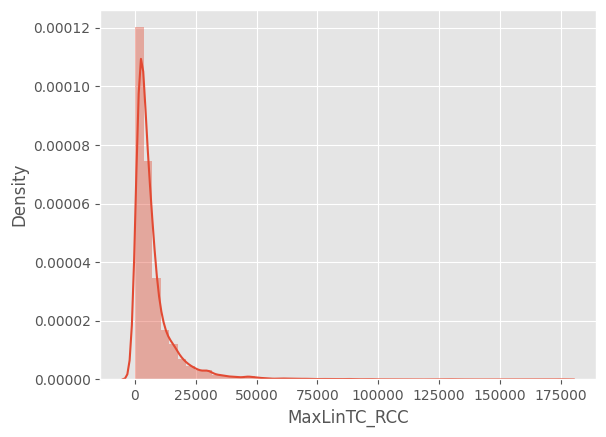

In [6]:
sns.distplot(Data['MaxLinTC_RCC'])
Data['MaxLinTC_RCC'].quantile([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, .97, .98, .99, 1])

**ANALISIS DE LA VARIABLE LINEA TC Y SALDO TC**

0.00       30.000000
0.10      475.134621
0.20      500.000000
0.30      550.000000
0.40      593.918276
0.50      633.512828
0.60      700.000000
0.70      855.242318
0.80     1100.000000
0.90     1700.000000
0.97     3750.000000
0.98     5150.896104
0.99     7400.359423
1.00    43155.384840
Name: LineaTC, dtype: float64

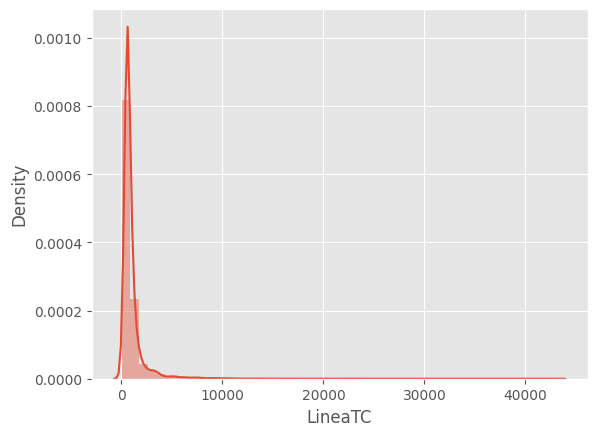

In [7]:
sns.distplot(Data['LineaTC'])
Data['LineaTC'].quantile([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, .97, .98, .99, 1])

0.00    -5579.721249
0.10       -0.041178
0.20        0.000000
0.30        0.000000
0.40        0.000000
0.50        0.000000
0.60       57.605955
0.70      161.252455
0.80      310.949547
0.90      519.344947
0.97      895.099556
0.98     1087.218751
0.99     1636.178966
1.00    26732.545656
Name: SaldoTC, dtype: float64

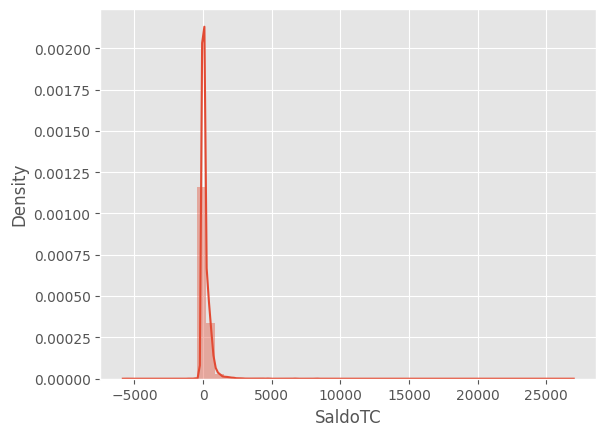

In [8]:
sns.distplot(Data['SaldoTC'])
Data['SaldoTC'].quantile([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, .97, .98, .99, 1])

**ANALISIS DE LA VARIABLE EDAD**

<Axes: xlabel='Edad', ylabel='Density'>

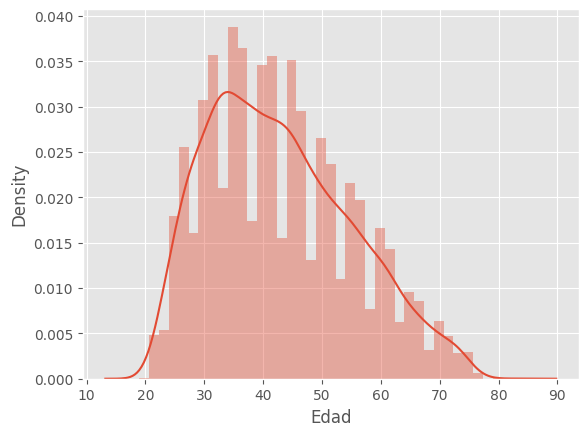

In [9]:
sns.distplot(Data['Edad'])

**ANALISIS DE LA VARIABLE INGRESOS**

0.00      651.8400
0.10      839.9600
0.20      963.6300
0.30     1046.6300
0.40     1120.9980
0.50     1189.3900
0.60     1268.2400
0.70     1355.6390
0.80     1473.4160
0.90     1694.4000
0.97     2430.4800
0.98     2730.5278
0.99     3402.6948
1.00    13400.0000
Name: Ingreso, dtype: float64

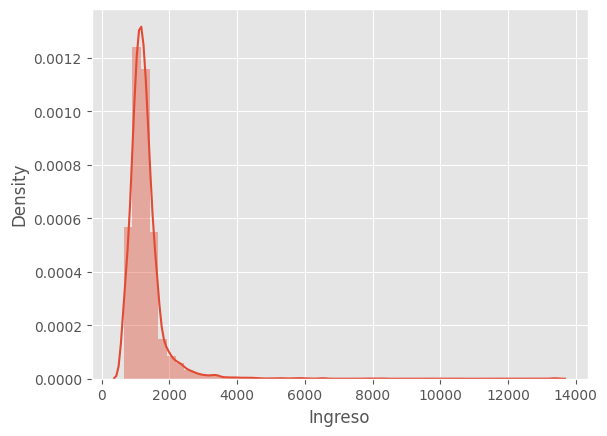

In [10]:
sns.distplot(Data['Ingreso'])
Data['Ingreso'].quantile([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, .97, .98, .99, 1])

0.00    0.0
0.10    1.0
0.20    1.0
0.30    1.0
0.40    1.0
0.50    1.0
0.60    1.0
0.70    1.0
0.80    1.0
0.90    2.0
0.97    3.0
0.98    3.0
0.99    3.0
1.00    7.0
Name: CantProd, dtype: float64

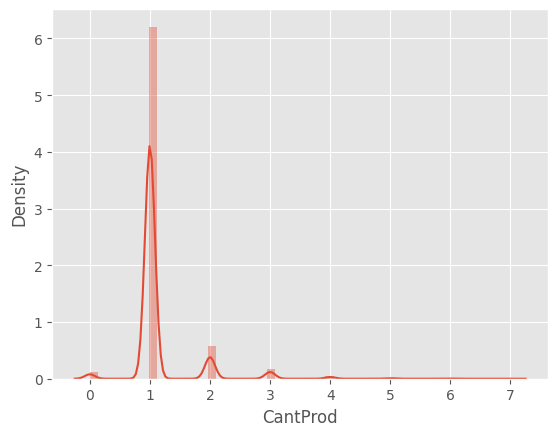

In [11]:
sns.distplot(Data['CantProd'])
Data['CantProd'].quantile([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, .97, .98, .99, 1])

**TRANSFORMACIÓN DE VARIABLES CONTINUAS**

In [12]:
Data["T_MaxLinTC_RCC"] = np.log(Data["MaxLinTC_RCC"])
Data["T_LineaTC"] = np.log(Data["LineaTC"])
Data["T_Ingreso"] = np.log(Data["Ingreso"])

In [13]:
Data["D_SaldoTC"] = np.where(Data["SaldoTC"] == 0,0,1)

**VERIFICACIÓN DE LA DISTRIBUCIÓN DE LA VARIABLE TRASNFORMADA**

<Axes: xlabel='T_MaxLinTC_RCC', ylabel='Density'>

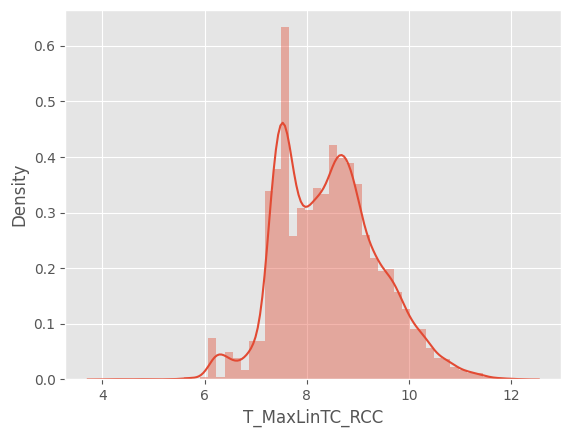

In [14]:
sns.distplot(Data['T_MaxLinTC_RCC'])

<Axes: xlabel='T_LineaTC', ylabel='Density'>

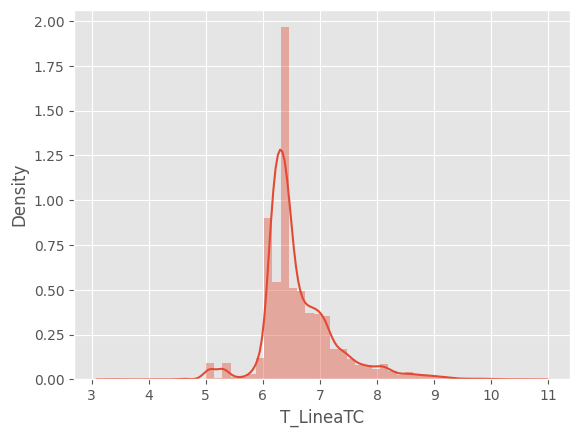

In [15]:
sns.distplot(Data['T_LineaTC'])

In [16]:
Data["D_SaldoTC"]

0       1
1       0
2       1
3       0
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: D_SaldoTC, Length: 10000, dtype: int64

<Axes: xlabel='T_Ingreso', ylabel='Density'>

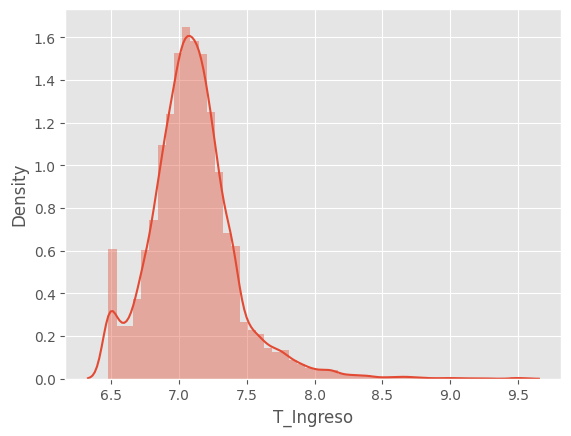

In [17]:
sns.distplot(Data['T_Ingreso'])

**TRATAMIENTO DE VARIABLES CATEGÓRICAS**

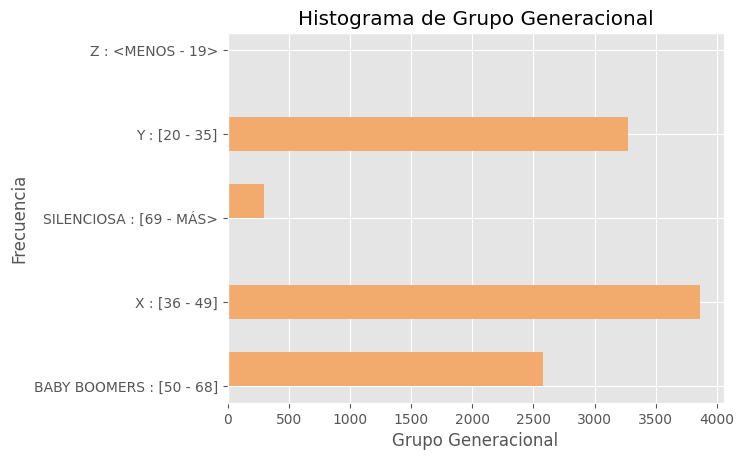

<Figure size 640x480 with 0 Axes>

In [18]:
plt.hist(x=Data['Gener'], bins=10, color='#F2AB6D', rwidth=5,histtype='bar',orientation='horizontal')
plt.grid(True)
plt.title('Histograma de Grupo Generacional')
plt.xlabel('Grupo Generacional')
plt.ylabel('Frecuencia')
plt.show()
plt.clf()

In [19]:
import scipy.stats as stats
stats.chi2_contingency(pd.crosstab(Data['Gener'],Data['ChurnTC']))

Chi2ContingencyResult(statistic=2.5751737326207977, pvalue=0.6312272273550052, dof=4, expected_freq=array([[2.0782476e+03, 4.9575240e+02],
       [2.3818300e+02, 5.6817000e+01],
       [3.1165640e+03, 7.4343600e+02],
       [2.6401980e+03, 6.2980200e+02],
       [8.0740000e-01, 1.9260000e-01]]))

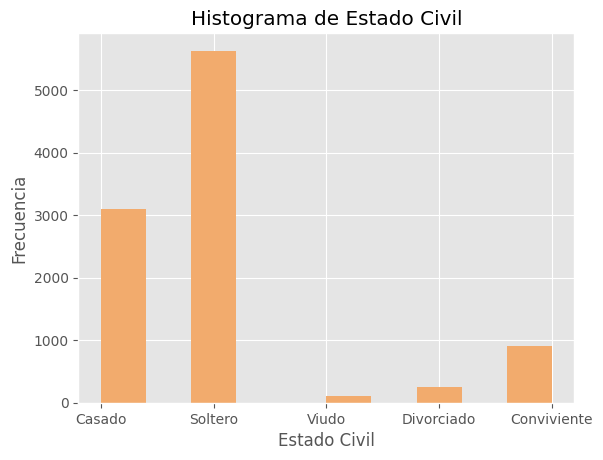

<Figure size 640x480 with 0 Axes>

In [20]:
plt.hist(x=Data['EstCiv'], bins=10, color='#F2AB6D', rwidth=5,histtype='bar',orientation='vertical')
plt.grid(True)
plt.title('Histograma de Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Frecuencia')
plt.show()
plt.clf()

In [21]:
stats.chi2_contingency(pd.crosstab(Data['EstCiv'],Data['ChurnTC']))

Chi2ContingencyResult(statistic=15.269896095123116, pvalue=0.004172957122212255, dof=4, expected_freq=array([[2502.94  ,  597.06  ],
       [ 734.734 ,  175.266 ],
       [ 208.3092,   49.6908],
       [4545.662 , 1084.338 ],
       [  82.3548,   19.6452]]))

In [22]:
pd.crosstab(Data['EstCiv'],Data['ChurnTC'],normalize='columns').round(3)*100

ChurnTC,NO,SI
EstCiv,,
Casado,30.9,31.5
Conviviente,8.6,11.1
Divorciado,2.7,2.0
Soltero,56.7,54.6
Viudo,1.1,0.9


In [23]:
Data["D_EstCiv_Cas"] = np.where(Data["EstCiv"] == "Casado",1,0)
Data["D_EstCiv_Sol"] = np.where(Data["EstCiv"] == "Soltero",1,0)
Data["D_EstCiv_Conv"] = np.where(Data["EstCiv"] == "Conviviente",1,0)

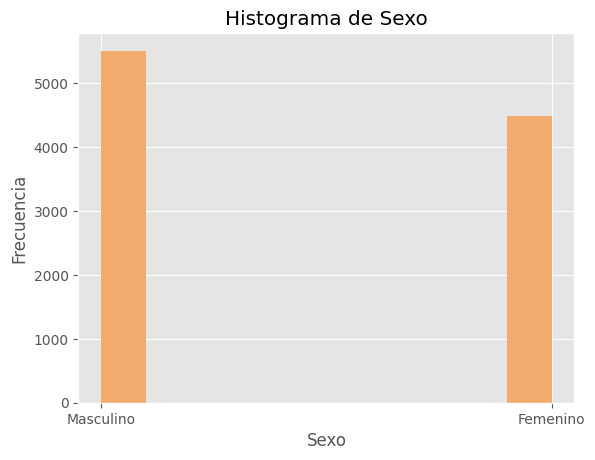

<Figure size 640x480 with 0 Axes>

In [24]:
plt.hist(x=Data['Sexo'], bins=10, color='#F2AB6D', rwidth=5,histtype='bar',orientation='vertical')
plt.grid(True)
plt.title('Histograma de Sexo')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')
plt.show()
plt.clf()

In [25]:
stats.chi2_contingency(pd.crosstab(Data['Sexo'],Data['ChurnTC']))

Chi2ContingencyResult(statistic=12.542705664273951, pvalue=0.0003977559440994508, dof=1, expected_freq=array([[3626.0334,  864.9666],
       [4447.9666, 1061.0334]]))

In [26]:
pd.crosstab(Data['Sexo'],Data['ChurnTC'],normalize='columns').round(3)*100

ChurnTC,NO,SI
Sexo,,
Femenino,45.8,41.3
Masculino,54.2,58.7


In [27]:
Data["D_Sexo_H"] = np.where(Data["Sexo"] == "Masculino",1,0)

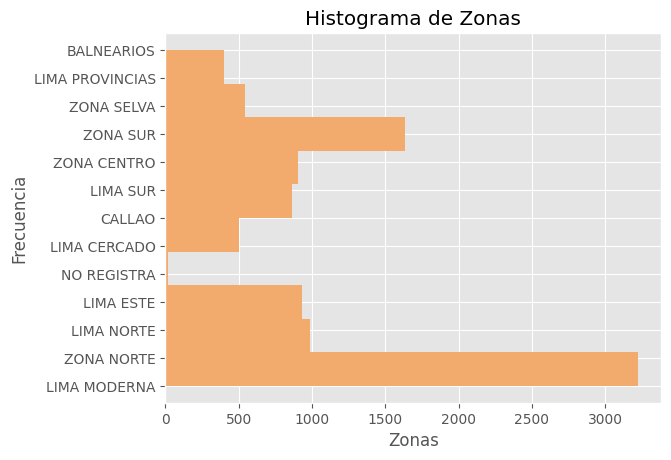

<Figure size 640x480 with 0 Axes>

In [28]:
plt.hist(x=Data['NZona'], bins=10, color='#F2AB6D', rwidth=5,histtype='bar',orientation='horizontal')
plt.grid(True)
plt.title('Histograma de Zonas')
plt.xlabel('Zonas')
plt.ylabel('Frecuencia')
plt.show()
plt.clf()

In [29]:
stats.chi2_contingency(pd.crosstab(Data['NZona'],Data['ChurnTC']))

Chi2ContingencyResult(statistic=118.1677717527395, pvalue=1.4323396256861856e-19, dof=12, expected_freq=array([[  13.7258,    3.2742],
       [ 377.0558,   89.9442],
       [ 402.8926,   96.1074],
       [ 754.1116,  179.8884],
       [1022.9758,  244.0242],
       [ 798.5186,  190.4814],
       [ 310.0416,   73.9584],
       [ 318.1156,   75.8844],
       [  13.7258,    3.2742],
       [ 728.2748,  173.7252],
       [1578.467 ,  376.533 ],
       [ 439.2256,  104.7744],
       [1316.8694,  314.1306]]))

In [30]:
pd.crosstab(Data['NZona'],Data['ChurnTC'],normalize='columns').round(3)*100

ChurnTC,NO,SI
NZona,,
BALNEARIOS,0.2,0.1
CALLAO,4.7,4.7
LIMA CERCADO,5.4,3.3
LIMA ESTE,9.7,7.7
LIMA MODERNA,13.8,7.9
LIMA NORTE,10.3,8.4
LIMA PROVINCIAS,3.7,4.4
LIMA SUR,3.9,4.0
NO REGISTRA,0.1,0.3


In [31]:
Data["D_NZONA_ZC"] = np.where(Data["NZona"] == "ZONA CENTRO",1,0)
Data["D_NZONA_ZN"] = np.where(Data["NZona"] == "ZONA NORTE",1,0)
Data["D_NZONA_ZS"] = np.where(Data["NZona"] == "ZONA SUR",1,0)

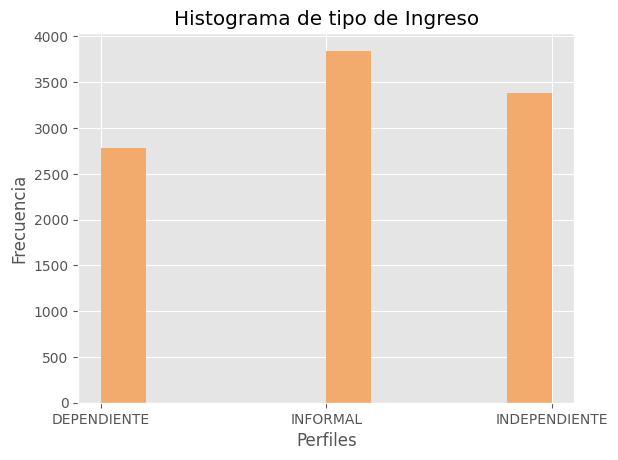

<Figure size 640x480 with 0 Axes>

In [32]:
plt.hist(x=Data['TipSuel'], bins=10, color='#F2AB6D', rwidth=5,histtype='bar',orientation='vertical')
plt.grid(True)
plt.title('Histograma de tipo de Ingreso')
plt.xlabel('Perfiles')
plt.ylabel('Frecuencia')
plt.show()
plt.clf()

In [33]:
stats.chi2_contingency(pd.crosstab(Data['TipSuel'],Data['ChurnTC']))

Chi2ContingencyResult(statistic=4.805188954736114, pvalue=0.09048289267430518, dof=2, expected_freq=array([[2243.7646,  535.2354],
       [2726.5898,  650.4102],
       [3103.6456,  740.3544]]))

In [34]:
pd.crosstab(Data['TipSuel'],Data['ChurnTC'],normalize='columns').round(3)*100

ChurnTC,NO,SI
TipSuel,,
DEPENDIENTE,27.5,29.1
INDEPENDIENTE,34.3,31.7
INFORMAL,38.3,39.1


In [35]:
Data["D_Depen"] = np.where(Data["TipSuel"] == "DEPENDIENTE",1,0)
Data["D_Informal"] = np.where(Data["TipSuel"] == "INFORMAL",1,0)

In [36]:
stats.chi2_contingency(pd.crosstab(Data['Entidad_RCC_TC'],Data['ChurnTC']))

Chi2ContingencyResult(statistic=93.99762437194899, pvalue=2.3914954112733017e-14, dof=13, expected_freq=array([[  29.88355995,    7.11644005],
       [  18.576267  ,    4.423733  ],
       [ 365.06402967,   86.93597033],
       [  35.53720643,    8.46279357],
       [ 277.83634116,   66.16365884],
       [ 718.0131026 ,  170.9868974 ],
       [ 872.27688504,  207.72311496],
       [1514.36959209,  360.63040791],
       [  11.30729295,    2.69270705],
       [1322.95327565,  315.04672435],
       [ 413.52385661,   98.47614339],
       [ 172.03238566,   40.96761434],
       [ 474.90630408,  113.09369592],
       [ 307.71990111,   73.28009889]]))

In [37]:
pd.crosstab(Data['Entidad_RCC_TC'],Data['ChurnTC'],normalize='columns').round(3)*100

ChurnTC,NO,SI
Entidad_RCC_TC,,
B. Azteca,0.4,0.6
B. Bif,0.3,0.1
B. Cencosud,5.9,4.3
B. Citibank,0.5,0.8
B. Continental,4.4,3.7
B. Credito,11.2,10.0
B. Falabella,13.9,11.2
B. Financiero,21.3,30.8
B. GNB,0.2,0.1


In [38]:
Data["D_SalTC_Fin"] = np.where(Data["Entidad_RCC_TC"] == "B.Financiero",1,0)
Data["D_SalTC_CrediScotia"] = np.where(Data["Entidad_RCC_TC"] == "F.Crediscotia",1,0)

In [39]:
Data["Fuga"] = np.where(Data["ChurnTC"] == "SI",1,0)

**ELABORACIÓN DE LA BASE DE DATOS A MODELAR**

In [40]:
DataModelo = pd.DataFrame(Data, columns=["Edad","D_EstCiv_Cas","D_EstCiv_Sol","D_EstCiv_Conv","D_Sexo_H",
                                         "D_NZONA_ZC","D_NZONA_ZN","D_NZONA_ZS","T_Ingreso",
                                         "T_MaxLinTC_RCC","CantProd",
                                         "D_LinTC_RCC_BCP","D_LinTC_RCC_IBK","D_LinTC_RCC_Conti",
                                         "D_LinTC_RCC_Ripley","D_LinTC_RCC_Cenco","D_LinTC_RCC_Fala","D_LinTC_RCC_Uno",
                                         "D_SalTC_RCC_BCP","D_SalTC_RCC_IBK","D_SalTC_RCC_Credi","D_SalTC_RCC_Ripley",
                                         "D_SalTC_RCC_Finan","D_SalTC_RCC_Cenco","Fuga"])

In [41]:
DataModelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Edad                10000 non-null  float64
 1   D_EstCiv_Cas        10000 non-null  int64  
 2   D_EstCiv_Sol        10000 non-null  int64  
 3   D_EstCiv_Conv       10000 non-null  int64  
 4   D_Sexo_H            10000 non-null  int64  
 5   D_NZONA_ZC          10000 non-null  int64  
 6   D_NZONA_ZN          10000 non-null  int64  
 7   D_NZONA_ZS          10000 non-null  int64  
 8   T_Ingreso           10000 non-null  float64
 9   T_MaxLinTC_RCC      10000 non-null  float64
 10  CantProd            10000 non-null  float64
 11  D_LinTC_RCC_BCP     10000 non-null  int64  
 12  D_LinTC_RCC_IBK     10000 non-null  int64  
 13  D_LinTC_RCC_Conti   10000 non-null  int64  
 14  D_LinTC_RCC_Ripley  10000 non-null  int64  
 15  D_LinTC_RCC_Cenco   10000 non-null  int64  
 16  D_Lin

In [42]:
DataModelo.head()

,Edad,D_EstCiv_Cas,D_EstCiv_Sol,D_EstCiv_Conv,D_Sexo_H,D_NZONA_ZC,D_NZONA_ZN,D_NZONA_ZS,T_Ingreso,T_MaxLinTC_RCC,...,D_LinTC_RCC_Cenco,D_LinTC_RCC_Fala,D_LinTC_RCC_Uno,D_SalTC_RCC_BCP,D_SalTC_RCC_IBK,D_SalTC_RCC_Credi,D_SalTC_RCC_Ripley,D_SalTC_RCC_Finan,D_SalTC_RCC_Cenco,Fuga
0,57.0,1,0,0,1,0,0,0,8.442745,11.344507,...,0,0,0,1,0,0,0,0,0,0
1,49.0,0,1,0,1,0,1,0,7.560080,9.852194,...,0,0,0,0,0,0,1,0,0,0
2,75.0,0,0,0,0,0,1,0,7.077000,9.276240,...,1,1,1,0,0,0,0,0,0,0
3,61.0,0,1,0,1,0,0,0,7.135520,8.788746,...,0,0,0,0,0,0,0,0,0,0
4,65.0,1,0,0,1,0,1,0,6.807603,7.344719,...,0,0,0,0,0,0,0,1,0,0


In [43]:
DataModelo.isnull().sum()

Edad                  0
D_EstCiv_Cas          0
D_EstCiv_Sol          0
D_EstCiv_Conv         0
D_Sexo_H              0
D_NZONA_ZC            0
D_NZONA_ZN            0
D_NZONA_ZS            0
T_Ingreso             0
T_MaxLinTC_RCC        0
CantProd              0
D_LinTC_RCC_BCP       0
D_LinTC_RCC_IBK       0
D_LinTC_RCC_Conti     0
D_LinTC_RCC_Ripley    0
D_LinTC_RCC_Cenco     0
D_LinTC_RCC_Fala      0
D_LinTC_RCC_Uno       0
D_SalTC_RCC_BCP       0
D_SalTC_RCC_IBK       0
D_SalTC_RCC_Credi     0
D_SalTC_RCC_Ripley    0
D_SalTC_RCC_Finan     0
D_SalTC_RCC_Cenco     0
Fuga                  0
dtype: int64

In [44]:
# División de los datos en train y test
# ==============================================================================
X = DataModelo.drop(columns='Fuga', axis=1)
y = DataModelo['Fuga']
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

**Base de entrenamiento under sampling**

In [45]:
import collections
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
rus = RandomUnderSampler(random_state=42, replacement=True)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
y2_train = pd.DataFrame(y_train)
y2_train_rus = pd.DataFrame(y_train_rus)
Tabla_conteo_us = pd.DataFrame({"FREC_ORI":y2_train.value_counts(),
                                "FREC_UNDER_SAMPLING":y2_train_rus.value_counts()})
Tabla_conteo_us

,FREC_ORI,FREC_UNDER_SAMPLING
0,,
0,6441,1559
1,1559,1559


**Base de entrenamiento over sampling**

In [46]:
import collections
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
y2_train = pd.DataFrame(y_train)
y2_train_ros = pd.DataFrame(y_train_ros)
Tabla_conteo_os = pd.DataFrame({"FREC_ORI":y2_train.value_counts(),
                                "FREC_OVER_SAMPLING":y2_train_ros.value_counts()})
Tabla_conteo_os

,FREC_ORI,FREC_OVER_SAMPLING
0,,
0,6441,6441
1,1559,6441


In [47]:
import collections
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
y2_train = pd.DataFrame(y_train)
y2_train_smote = pd.DataFrame(y_train_smote)
Tabla_conteo_smote = pd.DataFrame({"FREC_ORI":y2_train.value_counts(),
                                "FREC_SMOTE":y2_train_smote.value_counts()})
Tabla_conteo_smote

,FREC_ORI,FREC_SMOTE
0,,
0,6441,6441
1,1559,6441


**MODELAMIENTO - REGRESION LOGISTICA**

In [48]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train_smote = sm.add_constant(X_train_smote, prepend=True)
modelo = sm.Logit(endog=y_train_smote, exog=X_train_smote)
modelo = modelo.fit()
print(modelo.summary())

Optimization terminated successfully.
         Current function value: 0.589751
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                12882
Model:                          Logit   Df Residuals:                    12857
Method:                           MLE   Df Model:                           24
Date:                Sun, 21 Jan 2024   Pseudo R-squ.:                  0.1492
Time:                        01:17:50   Log-Likelihood:                -7597.2
converged:                       True   LL-Null:                       -8929.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.5375      0.627      7.236      0.000       3.308       5.767
Edad 

In [49]:
# Calcular la curva ROC
!pip install scikit-learn


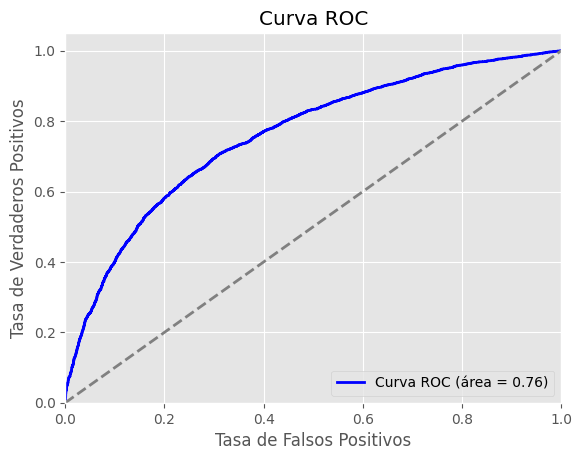

In [50]:
import sklearn.metrics
# Predicciones
# ==============================================================================
probs = modelo.predict(X_train_smote)
y_pred_probs = np.where(probs <= 0.5,0,1)

fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_train_smote,probs)
roc_auc = sklearn.metrics.auc(fpr, tpr)
roc_auc

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


<Axes: ylabel='Density'>

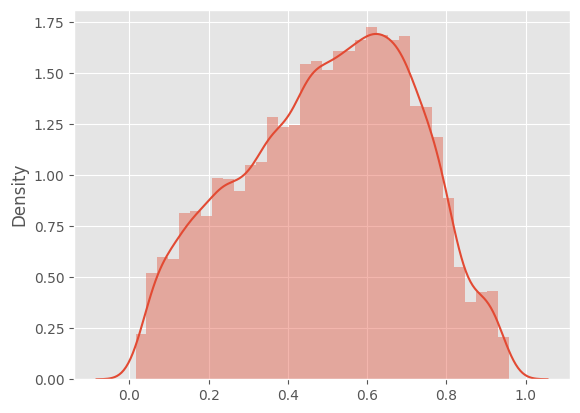

In [51]:
sns.distplot(probs)

In [52]:
# Accuracy de test del modelo
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
probs_test = modelo.predict(exog = X_test)
y_pred_test = np.where(probs_test<=0.5, 0, 1)
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = y_pred_test,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 61.7%


<Axes: ylabel='Density'>

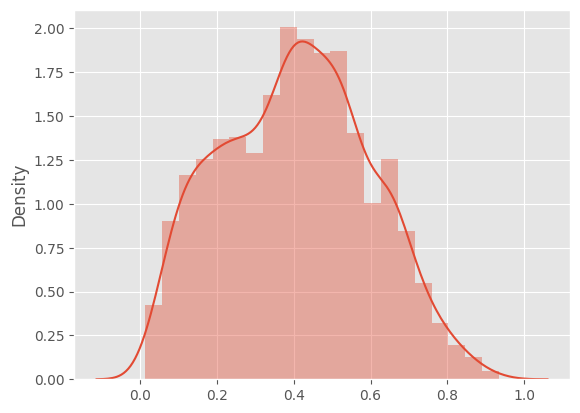

In [53]:
sns.distplot(probs_test)

In [54]:
# Matriz de confusión de las predicciones de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    y_pred_test,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,0,1
Real,,
0,1107,526
1,240,127
